In [53]:
#importing libraries for our purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### 1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [54]:
len(df)  # total 180 rows we have

180

In [55]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [56]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [57]:
df.isnull().sum()  # thats great, that we have no missing values in our dataset.

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [58]:
# Lets talk about Products first.
print("unique count of PRODUCTS are\n",df['Product'].value_counts())
# this means max sales is for KP281 (least expensive) and min is for KP781 (most expensive)

unique count of PRODUCTS are
 KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


180


([<matplotlib.patches.Wedge at 0x7f522e5826d0>,
 [Text(0.19101298416420226, 1.083288530300532, 'KP281'),
  Text(-0.8426488506529132, -0.7070664144854603, 'KP481'),
  Text(0.8426489499534077, -0.7070662961437348, 'KP781')],
 [Text(0.10418890045320121, 0.5908846528911992, '44.4%\n80'),
  Text(-0.4596266458106798, -0.38567258971934193, '33.3%\n60'),
  Text(0.45962669997458594, -0.3856725251693099, '22.2%\n40')])

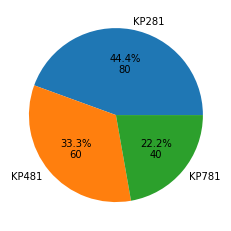

In [59]:
total = df['Product'].value_counts().values.sum()
print(total)
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df['Product'].value_counts().values, labels=df['Product'].value_counts().index, autopct=fmt)


In [60]:
print("min age is ",df['Age'].min())
print("max age is ",df['Age'].max())

min age is  18
max age is  50


values for every age group 
 B    110
C     48
D     12
A     10
Name: group, dtype: int64


([<matplotlib.patches.Wedge at 0x7f522e55e1f0>,
 [Text(-0.3762221361519222, 1.033661890692157, 'B'),
  Text(-0.03838944408549122, -1.0993299098008782, 'C'),
  Text(0.9328529388209179, -0.5829111377673075, 'D'),
  Text(1.0832885414779838, -0.1910129207737072, 'A')],
 [Text(-0.2052120742646848, 0.5638155767411764, '61.1%\n110'),
  Text(-0.0209396967739043, -0.5996344962550244, '26.7%\n48'),
  Text(0.5088288757205006, -0.3179515296912586, '6.7%\n12'),
  Text(0.5908846589879911, -0.10418886587656756, '5.6%\n10')])

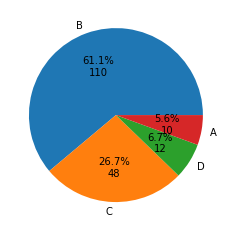

In [61]:
# lets do binning for AGE and find out which age group is more inclined towards fittness.

df.loc[df['Age'].between(10, 20, 'right'), 'group'] = 'A'
df.loc[df['Age'].between(20, 30, 'right'), 'group'] = 'B'
df.loc[df['Age'].between(30, 40, 'right'), 'group'] = 'C'
df.loc[df['Age'].between(40, 50, 'right'), 'group'] = 'D'

print("values for every age group \n",df['group'].value_counts())

# we observed age group 20-30 are more inclined towards fittness and then we have age group 30-40
# on second position. Henceforth the publicity team should focus more on people between this 
# age group (20-30 & 30-40) and make suitable ads for them.

plt.pie(df['group'].value_counts().values, labels=df['group'].value_counts().index, autopct=fmt)


unique count of GENDER are
 Male      104
Female     76
Name: Gender, dtype: int64


([<matplotlib.patches.Wedge at 0x7f522e527a90>,
 [Text(-0.2661141695451412, 1.0673252778639228, 'Male'),
  Text(0.26611426947534417, -1.0673252529485115, 'Female')],
 [Text(-0.14515318338825883, 0.5821774242894124, '57.8%\n104'),
  Text(0.14515323789564225, -0.582177410699188, '42.2%\n76')])

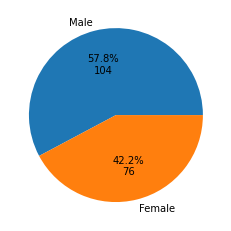

In [62]:
print("unique count of GENDER are\n",df['Gender'].value_counts())


plt.pie(df['Gender'].value_counts().values, labels=df['Gender'].value_counts().index, autopct=fmt)

# its good to see the ratio of female (42%) is comparatative with male(58%) for buying a treadmill.


unique count of Education are
 16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64


Text(0, 0.5, 'Frequency count')

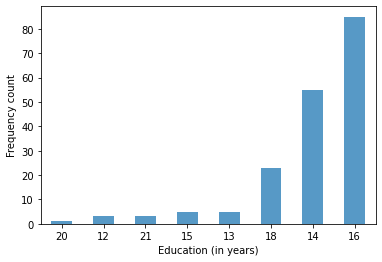

In [63]:
# Lets see the Education of people w.r.t inclination towards fitness

print("unique count of Education are\n",df['Education'].value_counts())

# we can say people who are educated for around 14 to 18 years are more likely to buy our product
# as compared to others. 16years of education i.e. graduate students are likely to buy maximum.


df['Education'].value_counts().sort_values().plot(kind='bar',alpha=0.75, rot=0) 
plt.xlabel("Education (in years)")
plt.ylabel("Frequency count")

unique count of Usage per week are
 3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64


Text(0, 0.5, 'Frequency count')

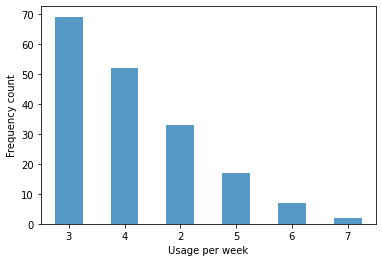

In [64]:
# Lets see the Usage of people w.r.t inclination towards fitness

print("unique count of Usage per week are\n",df['Usage'].value_counts())

# its weird to notice that people who uses the treadmill only 3-4 times a week buys more as compared to
# the people who uses for all days or 6 days.

df['Usage'].value_counts().plot(kind='bar',alpha=0.75, rot=0) 
plt.xlabel("Usage per week")
plt.ylabel("Frequency count")

In [65]:
print("min income is ",df['Income'].min())
print("max income is ",df['Income'].max())

# Lets do the bucketting for income as well.

min income is  29562
max income is  104581


values for every income group 
 B    106
A     32
C     23
D     16
E      3
Name: Income_group, dtype: int64


Text(0, 0.5, 'Frequency count')

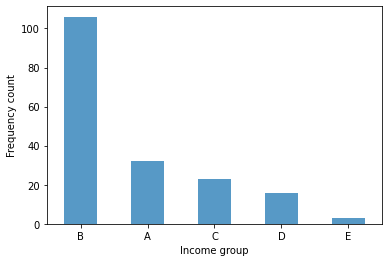

In [66]:
df.loc[df['Income'].between(20000, 40000, 'right'), 'Income_group'] = 'A'
df.loc[df['Income'].between(40000, 60000, 'right'), 'Income_group'] = 'B'
df.loc[df['Income'].between(60000, 80000, 'right'), 'Income_group'] = 'C'
df.loc[df['Income'].between(80000, 100000, 'right'), 'Income_group'] = 'D'
df.loc[df['Income'].between(100000, 130000, 'right'), 'Income_group'] = 'E'

print("values for every income group \n",df['Income_group'].value_counts())

df['Income_group'].value_counts().plot(kind='bar',alpha=0.75, rot=0) 
plt.xlabel("Income group")

plt.ylabel("Frequency count")

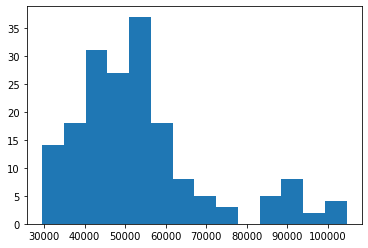

In [67]:
# Lets make the histogram bins for the original table itself.
plt.hist(df['Income'], bins=14)
plt.show()

# We observed the same in the above diagram using bins, the salary group between 40k to 60k 
# should be targetted more.

unique count of each of the fitness level are
 3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64


Text(0, 0.5, 'Frequency count')

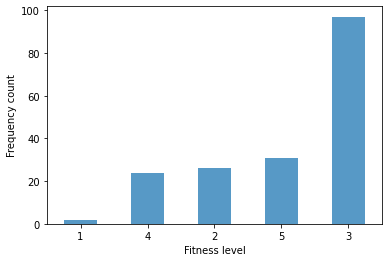

In [68]:
# Lets see the Fitness score given to people by themselves w.r.t inclination towards fitness

print("unique count of each of the fitness level are\n",df['Fitness'].value_counts())

df['Fitness'].value_counts().sort_values().plot(kind='bar',alpha=0.75, rot=0) 
plt.xlabel("Fitness level")
plt.ylabel("Frequency count")

# People who give fitness as 3 to themselves are more likely to buy since they want to improve themselves
# henceforth need little persuasion to buy.

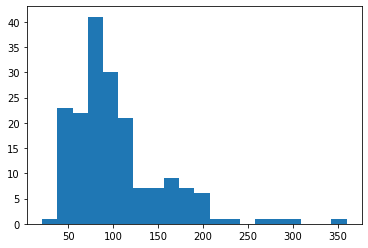

In [69]:
# Lets see the average number of miles the customer expects to walk/run each week
# w.r.t inclination towards fitness

plt.hist(df['Miles'], bins=20)
plt.show()

# People who beleive they can walk for 80-100 miles per week are likely to buy more.

### 2. Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

In [70]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Although the median(50%) and mean of every column seem to be almost equal but we can get more clarity for outliers after looking at the count of outliers for each column using boxplot.
since the range of all columns are different , we shall make different boxplot for every column



[]

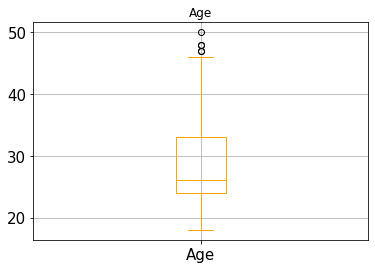

In [71]:

b_plot = df.boxplot(column = 'Age', color = 'orange', fontsize = 15 ) 
plt.title('Age')
b_plot.plot() 
# there are 3 outliers for Age. i.e. its unexpected for the person of age above 45 to buy treadmill.
# because of these outliers the mean age increased by 2.78 yrs

[]

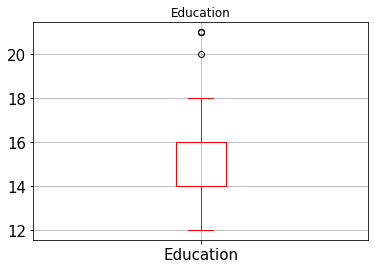

In [72]:
b_plot = df.boxplot(column = 'Education', color = 'red', fontsize = 15 ) 
plt.title('Education')
b_plot.plot() 

# there are 2 outliers for education whose years are greater than 20. 50% of our buyers have education
# in the range of 14 to 16 years. 

[]

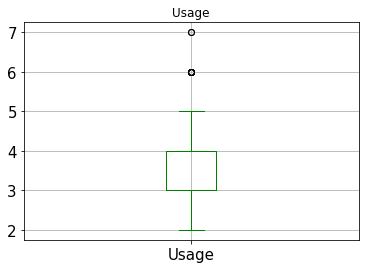

In [73]:
b_plot = df.boxplot(column = 'Usage', color = 'green', fontsize = 15 ) 
plt.title('Usage')
b_plot.plot() 

# there are only 2 outliers i.e. to workout 6 and 7 times a week is impossible for many people. 50% of the
# people workout for 3 to 4 days per week.

[]

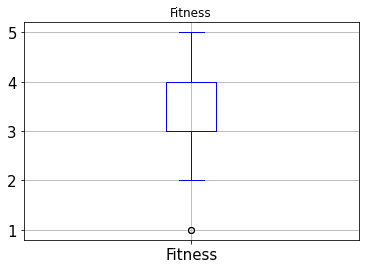

In [74]:
b_plot = df.boxplot(column = 'Fitness', color = 'blue', fontsize = 15 ) 
plt.title('Fitness')
b_plot.plot() 

# there was only 1 person who rated himself as 1/5 for fitness level. 50% of the people who buys the 
# treadmill gave themselves as 3 and 4.

[]

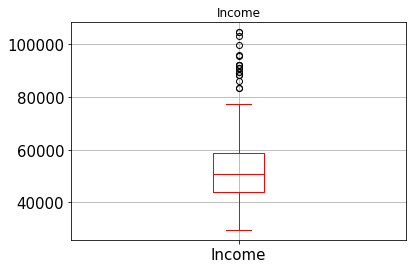

In [75]:
b_plot = df.boxplot(column = 'Income', color = 'red', fontsize = 15 ) 
plt.title('Income')
b_plot.plot() 

# there are lots of outliers in this case. This might be because if the person is too rich then he/she will
# make a purchase but might be for expensive ones which we will check later with the help of conditional
# probability. But 50% of the people who makes the purchases, their salaries lies around 50k.

### 3. Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)



In [76]:
# For marital status
# We can use crosstab over here since both product and marital status are categorical columns.

pd.crosstab(index = df['Product'], columns= df['MaritalStatus'], margins=True, normalize='index')

# Yes marital status have an affect on the product purchased. There is ratio of 6:4.
# ~60% chances (for all three products), if the person is Partnered then he will buy the product.
# ~40% chance (for all three products), if the person is Single then he will buy the product.

MaritalStatus,Partnered,Single
Product,,
KP281,0.600000,0.400000
KP481,0.600000,0.400000
KP781,0.575000,0.425000
All,0.594444,0.405556


[]

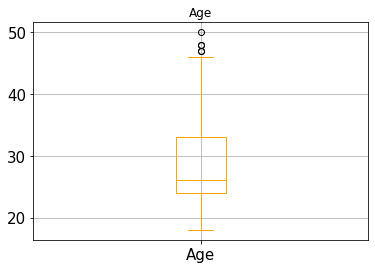

In [77]:
# For Age --

b_plot = df.boxplot(column = 'Age', color = 'orange', fontsize = 15 ) 
plt.title('Age')
b_plot.plot() 

# As seen above for box plots for all the columns, we can see the range of 50% data for the total sales.
# But to look into all three products individually we must make boxplots for each of the 3 products. 

<AxesSubplot:xlabel='Product', ylabel='Age'>

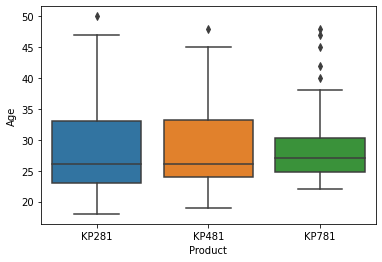

In [78]:
sns.boxplot(x=df['Product'] , y=df['Age'])

# Here we go, for all the categories we can see the 50% of the data keeps descreasing as the model
# increases (or its price). 
# we have lots of outliers for the expensive product i.e. KP781 since there are many people whose age
# is high but still prefers to buy the most expensive product (maybe because it has more safety options).

<AxesSubplot:xlabel='Product', ylabel='Education'>

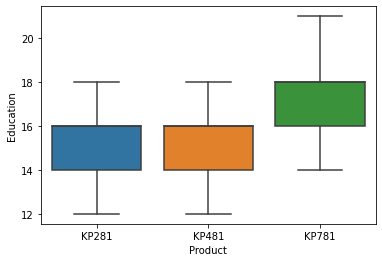

In [79]:
sns.boxplot(x=df['Product'] , y=df['Education'])

# More educated people tends to buy the expensive one. maybe they understand the features better henceforth
# will be able to use the product sophisticatedly.

<AxesSubplot:xlabel='Product', ylabel='Income'>

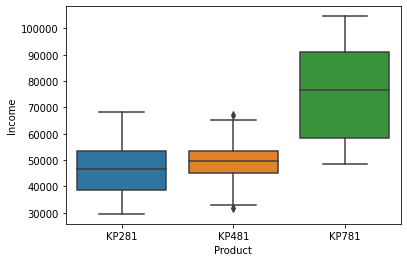

In [80]:
sns.boxplot(x=df['Product'] , y=df['Income'])

# Since Income was one the most important parameter which defines the purchasing power of a person.
# INSIGHT -- And as we can expect, the richer people buys the most expensive ones
# Recommendation -- Basically whose salary lies above 60k should be influced for only KP781 
# because they will surely but it. 

# range between 45k to 55k is confusing one , they can buy middle one or the least expensive one.
# Recommendation -- Salary range from 40k to 45k should stricly be targeted the least expensive one.

### 4. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)

### Honestly, I dont understand the concept of using crosstab over here since we need individual count of each treadmill category and we dont need the count of it along with any other column.
### Still, for the sake of it, I am doing it against gender to find the conditional probabilty.

In [81]:
pd.crosstab(index = df['Product'], columns= df['Gender'], normalize='columns')

# we can observe that out of all females, ~53% buys KP281 , ~38% buys KP481 and ~9.2% buys KP781 
# similary for males, 38% buys KP281, 30% buys KP481, and 31% buys KP781

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


In [82]:
pd.crosstab(index = df['Product'], columns= df['Gender'], normalize='index')

# out of total KP281 sales, females n males both purchased equally. 
# out of total KP481 sales, 48.3% were females buyers and 52% were male buyers.
# out of total KP781 sales, 17.5% were females buyers and 82.5% were male buyers.

# Recomendation - The most expensive treadmill should be targeted to males only. 

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


In [83]:
pd.crosstab(index = df['Product'], columns= df['Gender'], normalize='all')

# Out of total sales data, there were 22.2% instances for which the product was KP281 and the gender was female.
# similary we can see the rest of the combinations from the table below.

Gender,Female,Male
Product,,
KP281,0.222222,0.222222
KP481,0.161111,0.172222
KP781,0.038889,0.183333


In [84]:
pd.crosstab(index = df['Product'], columns= df['Gender'], margins=True)

#So out of total (180) purchases, 80 were for KP281 i.e. 44.44%. 
# 60 were for KP481 i.e. 33.33%.
# 40 were for KP781 i.e. 22.22%. 

# Insight --  As the Price goes up , the sales goes down. 

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [85]:
pd.crosstab(index = df['Product'], columns= df['Gender'],normalize='all', margins=True)

# same as above (Data overall in percentages for each product and gender)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


### 5. Check correlation among different factors using heat maps or pair plots.


<AxesSubplot:>

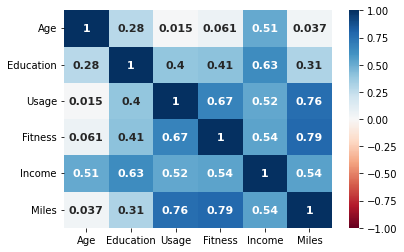

In [86]:
corr = df.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'})

# we can see the highest corelation among Fitness and Miles. The person who has rated high on his fitness 
# level expects to walk/run high per week. 
# Second highest correlation is between Usage and Miles. Again if a person is using the treadmill more every
# week then he/she is expected to walk more only.
# Third highest is Fitness and Usage.


# Basically all the 3 features (Usage,Miles and Fitness) are highly correlated and can be said as 
# redundant information.

# Age and Income are having a +ve correlation.
# Education as a +ve correlation with Usage,fitness and Miles. 
# Usage also has a +ve correlation with Income.
# Fitness have a +ve correlation with Usage, Miles and Income.

### 6. With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?

In [87]:
# first lets try with traditional method 

len(df[(df['Product']=='KP781') & (df['Gender']=='Male')])/len(df[df['Gender']=='Male'])

0.3173076923076923

In [88]:
# Also done above using crosstab, but doing again here below - 

pd.crosstab(index = df['Product'], columns= df['Gender'], normalize='columns')

# SO we can say that there is ~32% chances a male will buy KP781.

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


### 7. Customer Profiling - Categorization of users.

### Lets do customer profiling based on every attribute and its possible combinations - 

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


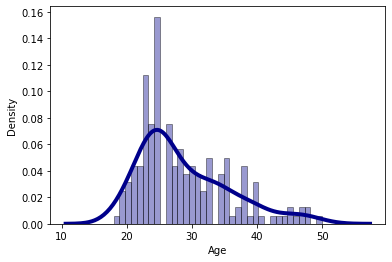

In [89]:
import seaborn as sns
sns.distplot(df['Age'], hist=True, kde=True, 
bins=int(36), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

# As already discussed , age 20-30 is highly active and hence should be targetted. The data is right skewed
# which means there are people above 30 as well who are willing to buy.

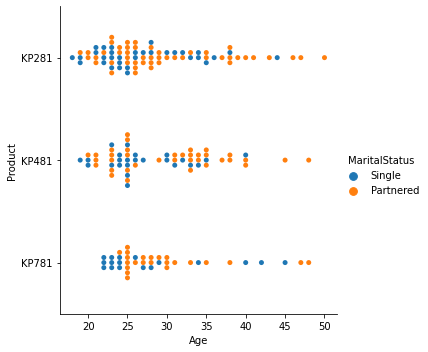

In [90]:
# Clubbing Age with MaritalStatus 

sns.catplot(data=df, x="Age", y="Product", hue="MaritalStatus", kind="swarm")

# It seems Marital Status do not have a huge impact on buying for each category.

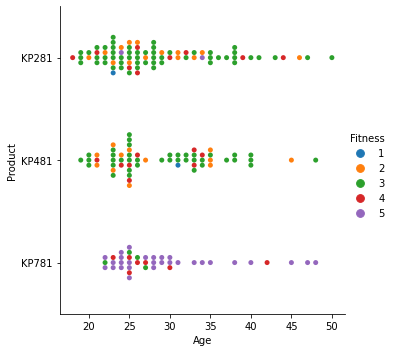

In [91]:
# Clubbing Age with Fitness 

sns.catplot(data=df, x="Age", y="Product", hue="Fitness", kind="swarm")

# Recomendation -- People who beleive are most fit and lies in the age range of 20-30 will tend to 
# buy the most expensive product (KP781)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


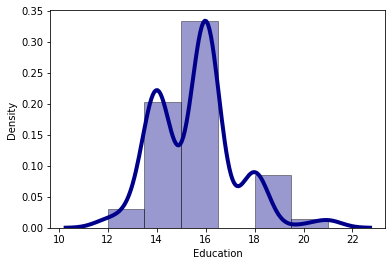

In [92]:
sns.distplot(df['Education'], hist=True, kde=True, 
bins=int(6), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

# Insights and Recomendations - 
# People with education years around 16 - Top Focus on advertisement
# People with education years around 14 - second level Focus on advertisement

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


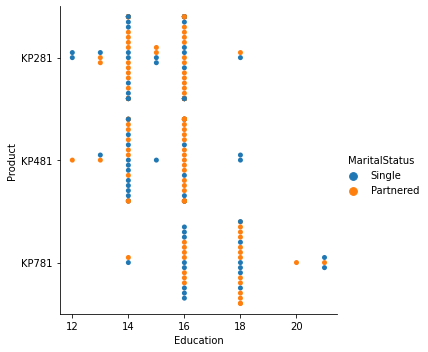

In [93]:
# Clubbing Education with MaritalStatus 

sns.catplot(data=df, x="Education", y="Product", hue="MaritalStatus", kind="swarm")


# INSIGHTS & Recomendations-

# Person whose education is 14yrs and is partnered will tend to buy KP281 so dont even bother to convince him
# for KP781. But for KP481, irrespective of marital status they can buy.
# People whose education is 18yrs, they will surely buy KP781 since they are educated enough to understand
# the extra features company has provided for the most expensive product.

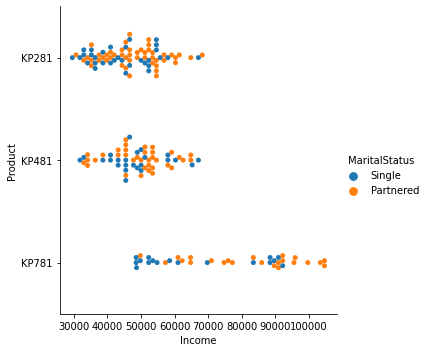

In [94]:
# Clubbing Income with MaritalStatus 

sns.catplot(data=df, x="Income", y="Product", hue="MaritalStatus", kind="swarm")

# Firstly marital status if of the picture here since for all 3 categories we have equal number of single
# and partnered. 

# Recomendations - 
# People whose salary is not beyond 50k, should not be advertised with KP781. 
# People whose salary range is 30k-55k, should be advertised with KP481 and KP281.

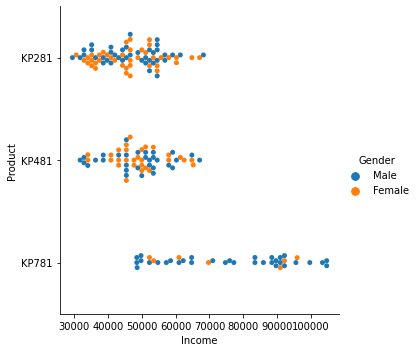

In [95]:
# Clubbing Income with Gender 

sns.catplot(data=df, x="Income", y="Product", hue="Gender", kind="swarm")

# If a person is a male and his salary is greater than `50K, Convince him to buy KP781. 
# For other 2 categories, Gender doesnt really play a huge role. 

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


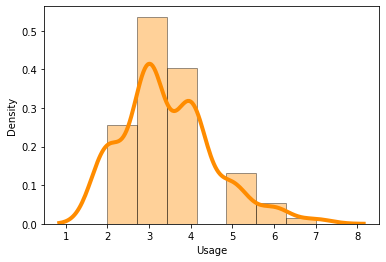

In [96]:
sns.distplot(df['Usage'], hist=True, kde=True, 
bins=int(7), color = 'darkorange', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

# People whose usage is 3-4 times a week tend to purchase more as compared to others.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


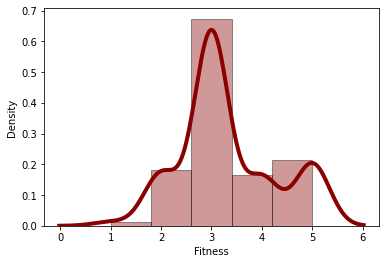

In [97]:
sns.distplot(df['Fitness'], hist=True, kde=True, 
bins=int(5), color = 'darkred', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

# People rating themselves as 3/5 has high chances to buy the product.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


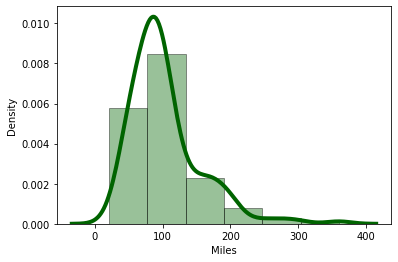

In [98]:
sns.distplot(df['Miles'], hist=True, kde=True, 
bins=int(6), color = 'darkgreen', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

# People who expect to walk around 100 miles each week are expected to buy the product.

### 8. Probability- marginal, conditional probability.

In [99]:
# marginal - Also known as individual probabilty - Shall be doing for categorical attributes.

print("Probab of Product KP281 to be sold",round(len(df[(df['Product']=='KP281')])/len(df),2))
print("Probab of Product KP481 to be sold",round(len(df[(df['Product']=='KP481')])/len(df),2))
print("Probab of Product KP781 to be sold",round(len(df[(df['Product']=='KP781')])/len(df),2))

# OR 

df['Product'].value_counts(normalize=True)


Probab of Product KP281 to be sold 0.44
Probab of Product KP481 to be sold 0.33
Probab of Product KP781 to be sold 0.22


KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [100]:
print("Probab of single person to purchase",round(len(df[(df['MaritalStatus']=='Single')])/len(df),2))
print("Probab of Partnered person to purchase",round(len(df[(df['MaritalStatus']=='Partnered')])/len(df),2))

Probab of single person to purchase 0.41
Probab of Partnered person to purchase 0.59


In [101]:
print("Probab of Male person to purchase",round(len(df[(df['Gender']=='Male')])/len(df),2))
print("Probab of Female person to purchase",round(len(df[(df['Gender']=='Female')])/len(df),2))

Probab of Male person to purchase 0.58
Probab of Female person to purchase 0.42


In [102]:
# Conditional Probabilty - Can be done either by traditional way or using crosstab. 

pd.crosstab(index = df['Product'], columns= df['Gender'], normalize='columns')

# Given a person is female there is 52% chance that she will buy KP281, 38% chance she will buy KP481 and 
# 9% chance she will buy KP791.
# Given a person is male there is 38% chance that he will buy KP281, 30% chance he will buy KP481 and
# 31% chance he will buy KP781.

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


In [103]:
pd.crosstab(index = df['Product'], columns= df['MaritalStatus'], normalize='columns')

# Given that the person is Partnered, there is 44.8% chance that they will buy KP281, 33.6% chance that they
# will buy KP481 and 21.4% chance that they will buy KP781.
# Given that the person is Single, there is 43.8% chance that they will buy KP281, 33% chance that they will
# buy KP481 and 23% chance that they will buy KP781.

MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877
